<a href="https://colab.research.google.com/github/ismailazdad/vision_detection_benchmark/blob/main/yolov6_white_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Sommaire
        </h1>
    </div>
</div>

- **[Preparation du dataset](#pre)**

- **[Verification des annotations](#ve)**

- **[Yolo v6 entrainement](#en)**

- **[Resultat](#re)**

- **[Test du modele](#te)**

https://github.com/meituan/YOLOv6



In [ ]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image, ImageDraw

<a name='pre'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preparation du datatset
        </h1>
    </div>
</div>

Repartition du dataset :

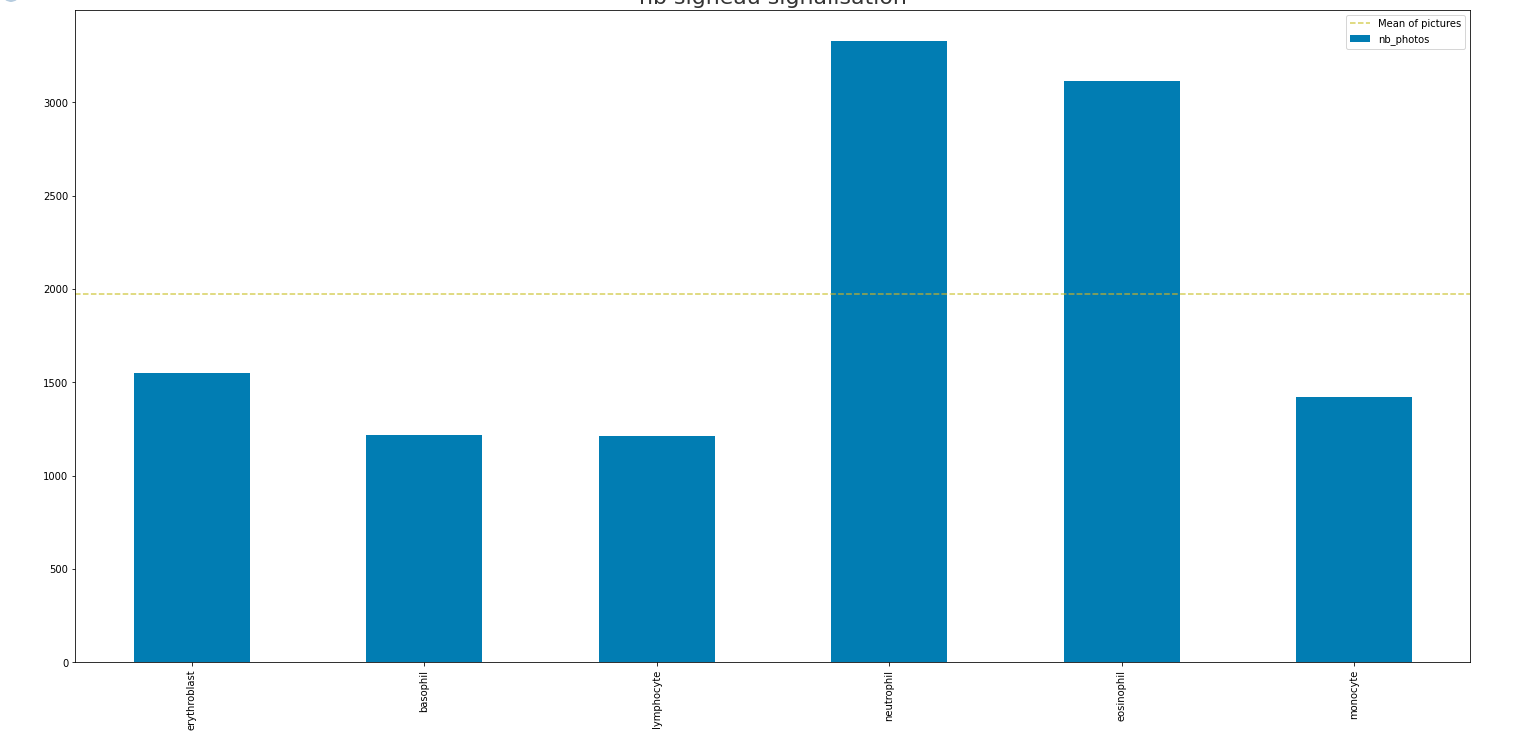

In [ ]:
!rm -rf /content/bloods

In [ ]:
!unzip /content/ShardDrives/MyDrive/bloods/blood_dataset_yolo.zip -d /content/

In [ ]:
cd /content/

/content


In [ ]:
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1502, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 1502 (delta 28), reused 55 (delta 22), pack-reused 1431
Receiving objects: 100% (1502/1502), 14.61 MiB | 33.86 MiB/s, done.
Resolving deltas: 100% (811/811), done.


In [ ]:
%cd YOLOv6
!pip install -r requirements.txt

In [ ]:
!cp -avr /content/ShardDrives/MyDrive/bloods/blood.yaml /content/YOLOv6/data/blood.yaml

'/content/ShardDrives/MyDrive/bloods/blood.yaml' -> '/content/YOLOv6/data/blood.yaml'


In [ ]:
cd /content/YOLOv6/

/content/YOLOv6


In [ ]:
pwd

'/content/YOLOv6'

In [ ]:
lymp_list = ['basophil','erythroblast','lymphocyte','neutrophil','eosinophil','monocyte']
class_name_to_id_mapping = {}
for i, elem in enumerate(lymp_list):
    class_name_to_id_mapping[elem] = i
print(class_name_to_id_mapping)

{'basophil': 0, 'erythroblast': 1, 'lymphocyte': 2, 'neutrophil': 3, 'eosinophil': 4, 'monocyte': 5}


In [ ]:
cd ..

/


In [ ]:
pwd

'/'

In [ ]:
/content/blood_dataset_yolo/labels

In [ ]:
annotations = [os.path.join('/content/blood_dataset_yolo/labels/test', x) for x in os.listdir('/content/blood_dataset_yolo/labels/test') if x[-3:] == "txt"]
annotations

In [ ]:
# import glob
# for filename in glob.iglob('/content/blood_dataset_yolo/labels/**/*.txt', recursive=True):
#      print(filename)

In [ ]:
from pathlib import Path
from os.path import isfile

len([x for x in Path('/content/blood_dataset_yolo/labels/').rglob('*') if isfile(x)])

11838

In [ ]:
import os
path = '/content/blood_dataset_yolo/labels/'
mn = 20
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) ]) # get all directories 
for folder in folders:
    contents = os.listdir(os.path.join(path,folder)) # get list of contents
    if len(contents) > mn: # if greater than the limit, print folder and number of contents
        print(folder,len(contents))

train 9470
val 1183
test 1185


In [ ]:
import os
import sys
annotation_list = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/content/blood_dataset_yolo/labels/'):
    for filename in files:
        subdirectoryPath = os.path.relpath(subdir, 'labels') #get the path to your subdirectory
        filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
#         path = '/media/ismail/Elements/formation/projet7/standford_dogs_dataset_yolo/labels/'+ subdirectoryPath+'/'
        if(filename.find('.txt') > 0):
            annotation_list.append(filePath.replace('..',''))
print(len(annotation_list))

11838


In [ ]:
annotation_list[0]

'//blood_dataset_yolo/labels/train/BA_322445.txt'

<a name='ve'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Verification des annotations
        </h1>
    </div>
</div>

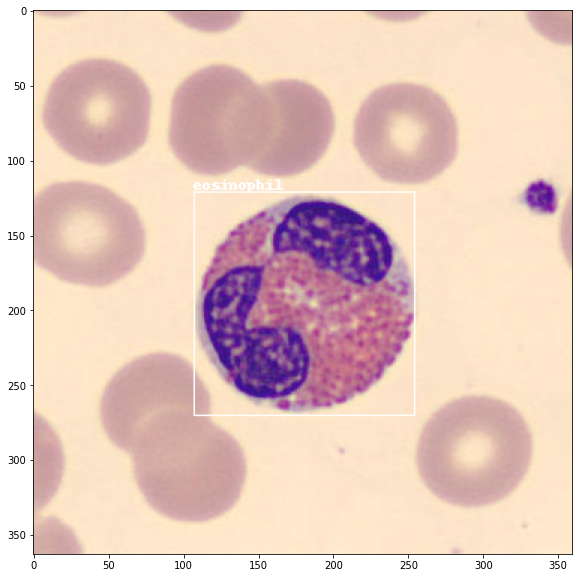

In [ ]:
import random
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

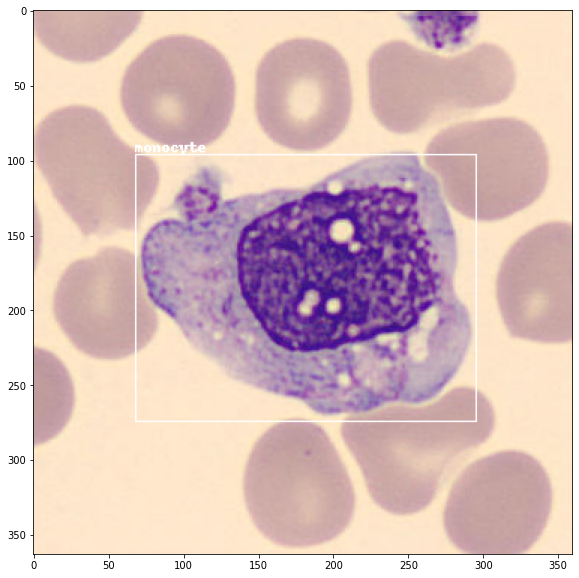

In [ ]:
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

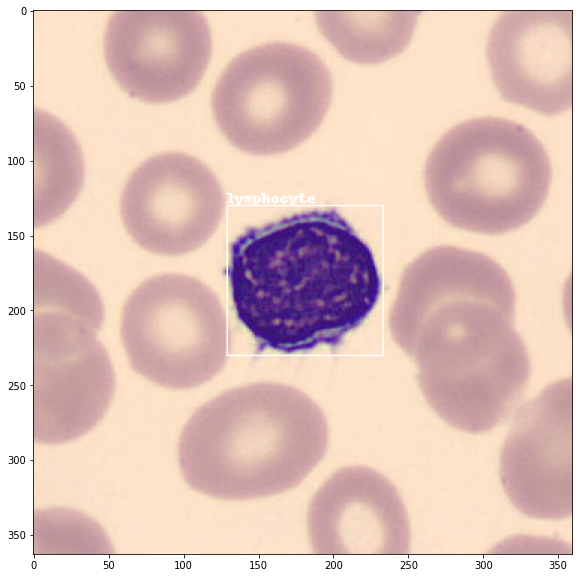

In [ ]:
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
!pip install wandb
!wandb login

In [ ]:
!wandb.init(project="blood_5l", entity="ismail-azdad")

/bin/bash: -c: line 0: syntax error near unexpected token `project="blood_5l",'
/bin/bash: -c: line 0: `wandb.init(project="blood_5l", entity="ismail-azdad")'


In [ ]:
!pwd

/content/YOLOv6


<a name='en'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Yolo v6 entrainement
        </h1>
    </div>
</div>

In [ ]:
# !python train.py  --hyp hyp.scratch-med.yaml --img 360 --batch 16 --epochs 50 --data blood.yaml --weights yolov5l.pt --cfg yolov5l.yaml --project bloods --name blood --device 0 --cache


#single gpu
!python tools/train.py --batch 64 --conf configs/yolov6s.py --epochs 50 --img-size 360 --data data/blood.yaml --device 0 
#multiple gpu
# !python -m torch.distributed.launch --nproc_per_node 4 tools/train.py --img-size 360 --epochs 50 --batch 16 --conf configs/yolov6s_finetune.py --data data/blood.yaml --device 0,1

Using 1 GPU for training... 
training args are: Namespace(batch_size=64, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='data/blood.yaml', device='0', dist_url='env://', epochs=50, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=360, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp14', workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 9470/ labels: 9470. 
0.3s for dataset initialization.
Convert to COCO format
100% 1183/1183 [00:00<00:00, 45380.94it/s]
Convert to COCO format finished. Resutls saved in /content/blood_dataset_yolo/annotations/instances_val.json
Val: Final numbers of valid images: 1183/ labels: 1183. 
0.2s for dataset initialization.
Model: Model(
  (backbone): EfficientRep(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)
      (se): Identity()
      (rbr_dense): Sequential(
        (conv): C

In [ ]:
!mkdir /content/ShardDrives/MyDrive/bloods/blood_result_yolov6s

In [ ]:
!cp -fr /content/YOLOv6/runs/train/exp14 /content/ShardDrives/MyDrive/bloods/blood_result_yolov6s

In [ ]:
!cd /content/yolov5/

In [ ]:
# !python detect.py --source /content/blood_dataset_yolo/images/test/ --weights /content/yolov5/bloods/blood3/weights/best.pt --conf 0.25 --name bloods
!python tools/infer.py --yaml data/blood.yaml --conf-thres 0.25 --name yolov6_detection --img-size 360 --weights /content/YOLOv6/runs/train/exp14/weights/best_ckpt.pt --source /content/blood_dataset_yolo/images/test/ --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=360, iou_thres=0.45, max_det=1000, name='yolov6_detection', project='runs/inference', save_dir=None, save_img=True, save_txt=False, source='/content/blood_dataset_yolo/images/test/', view_img=False, weights='/content/YOLOv6/runs/train/exp14/weights/best_ckpt.pt', yaml='data/blood.yaml')
Loading checkpoint from /content/YOLOv6/runs/train/exp14/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1185/1185 [00:23<00:00, 51.21it/s]
Results saved to runs/inference/yolov6_detection


In [ ]:
!cp -fr /content/YOLOv6/runs/inference/yolov6_detection /content/ShardDrives/MyDrive/bloods/blood_result_yolov6s/

In [ ]:
!cp -fr /content/YOLOv6/runs/val/blood_test2 /content/ShardDrives/MyDrive/bloods/blood_result_yolov6s/

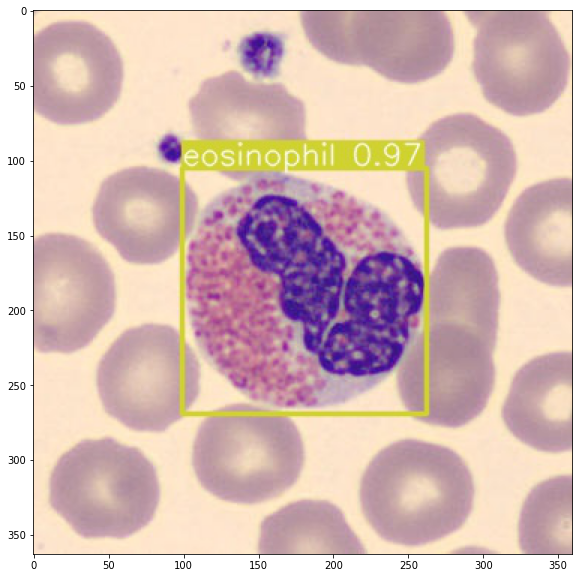

In [ ]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,10))
detections_dir = "/content/YOLOv6/runs/inference/yolov6_detection/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

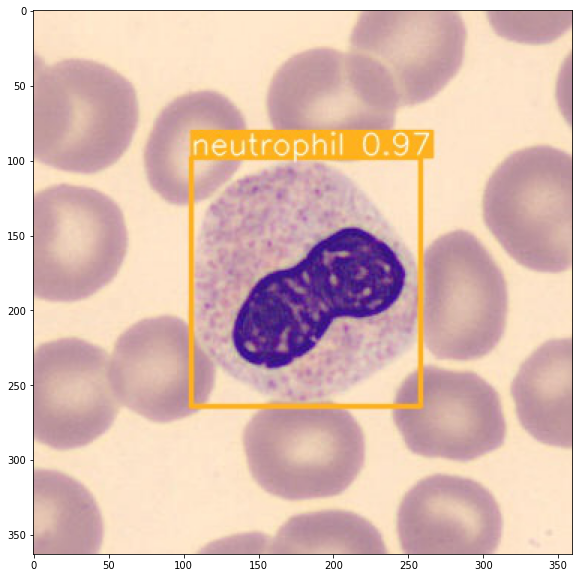

In [ ]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

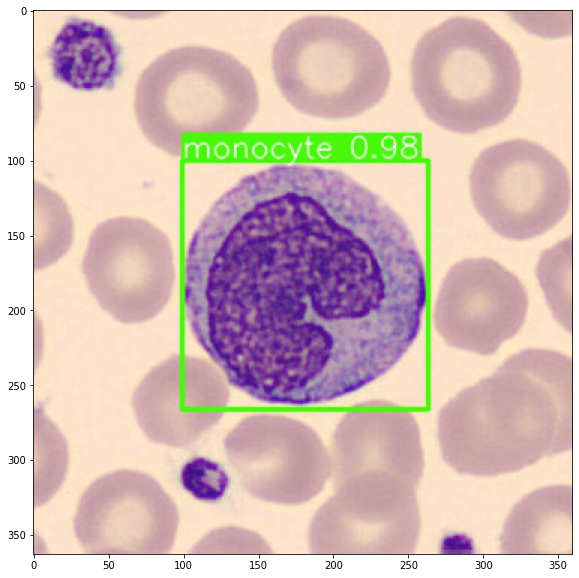

In [ ]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

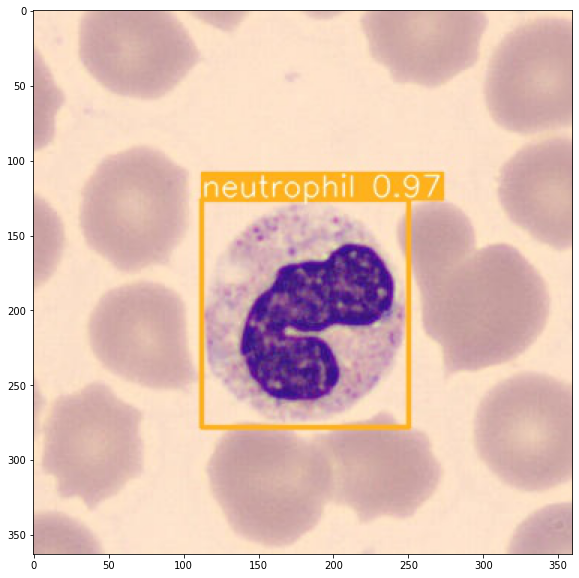

In [ ]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
!pwd

/content/YOLOv6


<a name='re'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat
        </h1>
    </div>
</div>

In [ ]:
# !python val.py --weights  /content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/weights/best.pt --data blood.yaml --task test --name blood_test --img 360 --verbose

!python tools/eval.py --data data/blood.yaml  --name blood_test  --weights /content/YOLOv6/runs/train/exp14/weights/best_ckpt.pt  --device 0 


Namespace(batch_size=32, conf_thres=0.001, data='data/blood.yaml', device='0', half=False, img_size=640, iou_thres=0.65, name='blood_test', save_dir='runs/val/', task='val', weights='/content/YOLOv6/runs/train/exp14/weights/best_ckpt.pt')
Loading checkpoint from /content/YOLOv6/runs/train/exp14/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 44.08
Val: Checking formats of labels with 8 process(es): 
1183 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 1183/1183 [00:00<00:00, 11249.68it/s]
Convert to COCO format
100% 1183/1183 [00:00<00:00, 156976.23it/s]
Convert to COCO format finished

In [ ]:
# !python detect.py --source /content/standford_dogs_dataset/images/test/ --weights /content/ShardDrives/MyDrive/dogs/best.pt --conf 0.25 --name dogs --line-thickness 1

<a name='te'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Test du modele
        </h1>
    </div>
</div>

In [ ]:
def show_images_from_directory(path, num_sample):
    fig = plt.figure(figsize=(100,100))
    fig.patch.set_facecolor('#377AB7')
    images = os.listdir(path + "/" )[:num_sample]
    for i in range(num_sample):
        img = imgmp.imread(path+"/"+images[i])
        plt.subplot(num_sample/num_sample+1, num_sample, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show() 

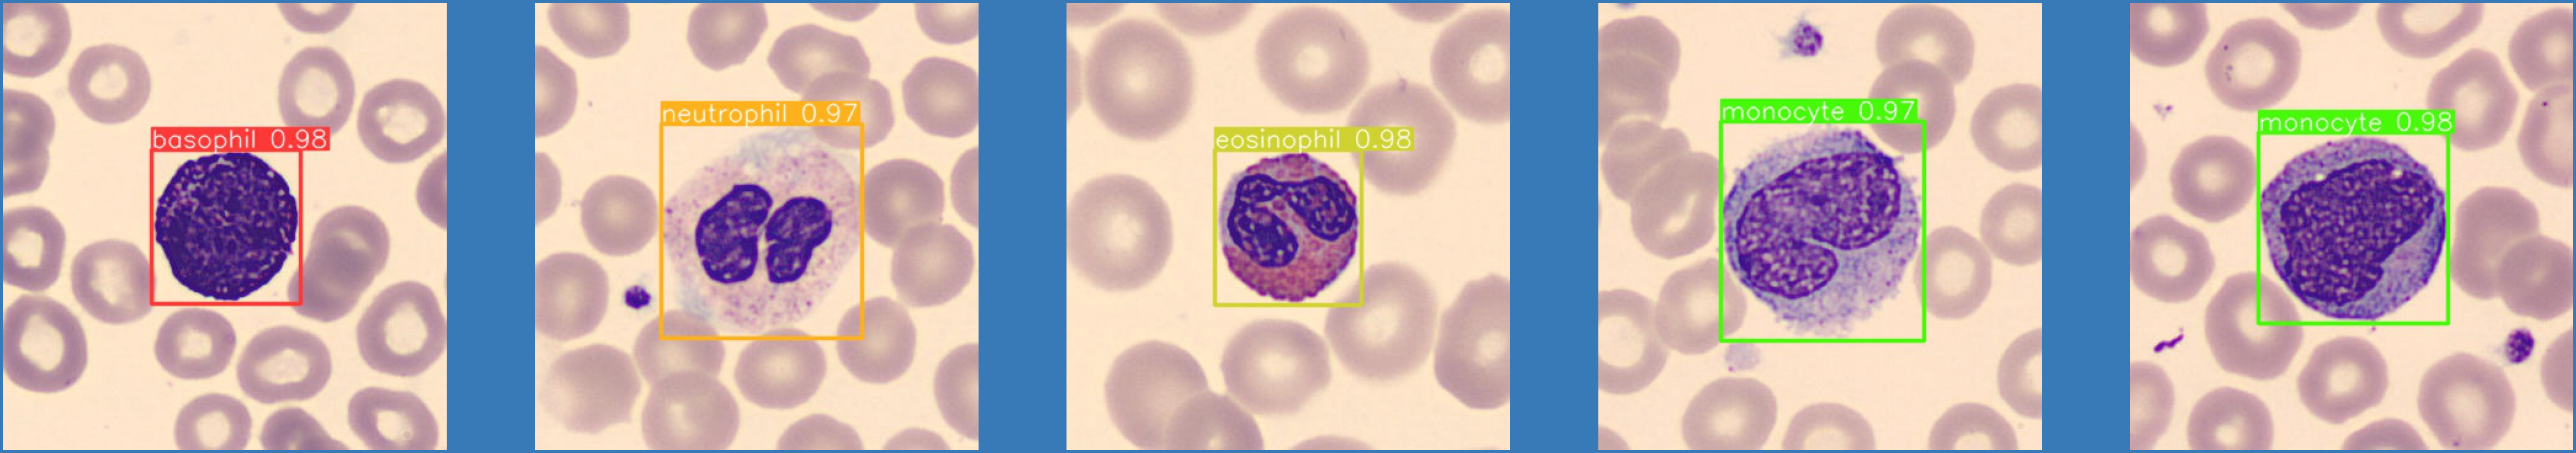

In [ ]:
import matplotlib.image as imgmp
import os
show_images_from_directory("/content/YOLOv6/runs/inference/yolov6_detection", 5)

In [ ]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt
detections_dir = "/content/YOLOv6/runs/inference/yolov6_detection"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

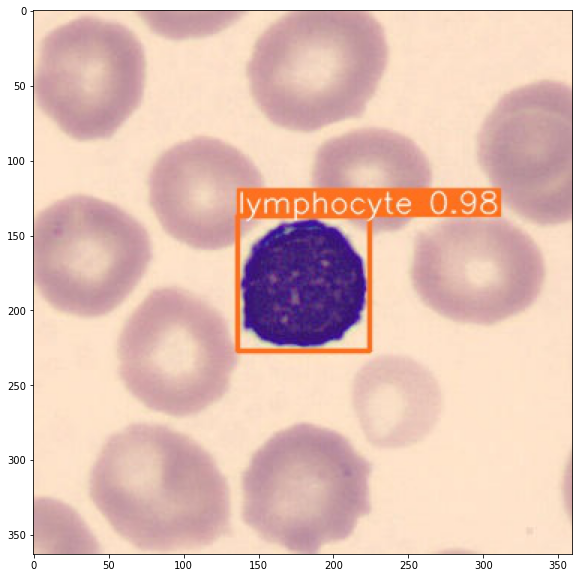

In [ ]:
plt.figure(figsize=(10,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

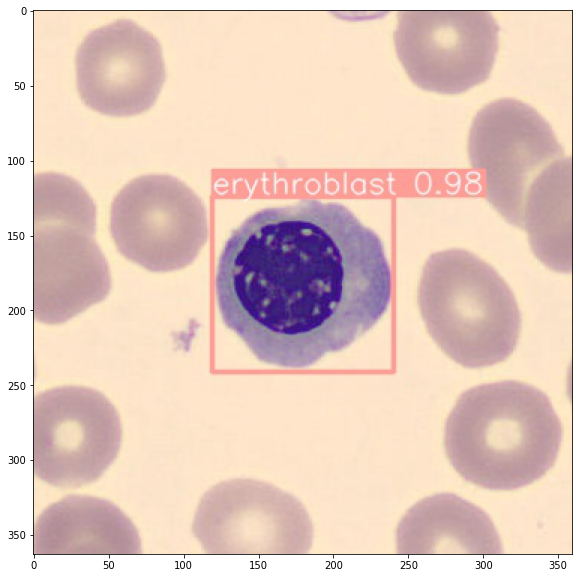

In [ ]:
plt.figure(figsize=(10,10))
random.seed(10)
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

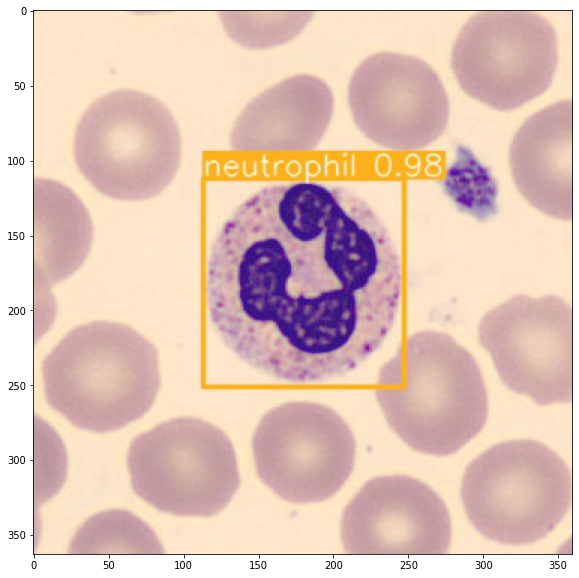

In [ ]:
plt.figure(figsize=(10,10))
random.seed(520)
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))